In [2]:
#importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os                  # dealing with directories
import matplotlib.pyplot as plt

# Part 1: Language Detection

In [3]:
# Loading the files
nums = range(0, 30) 
path = r"D:\Courses\CS156\13.2\symbol"
files_train_A_ = ['\language-training-langA-%d' % y for y in nums] 
files_train_A =[path+i for i in files_train_A_]
files_train_B_ = ['\language-training-langB-%d' % y for y in nums] 
files_train_B =[path+i for i in files_train_B_]
files_train_C_ = ['\language-training-langC-%d' % y for y in nums] 
files_train_C =[path+i for i in files_train_C_]

nums_test = range(0, 10)
files_test_ = ['\language-test-%d' % y for y in nums_test] 
files_test =[path+i for i in files_test_]


In [7]:
# the train and test files:
train_A = [pd.read_csv(i).columns[0] for i in files_train_A]
train_B = [pd.read_csv(i).columns[0] for i in files_train_B]
train_C = [pd.read_csv(i).columns[0] for i in files_train_C]

test = [pd.read_csv(i).columns[0] for i in files_test]

In [8]:
letters = list(set(train_A[0]))
letters

['k', 'A', 'g', 't', 'o', 'e', 'p']

From our discussion in the class, we derived that the values that achieve the maximum likelhiood can be obtained by counting how many letters come after each letter in the sequence(we did that by taking the derivative of the log of the likeihood function to obtain the paramters that maximize the likelihood). I'm going to apply that here to calculate the elements of the transition matrix. I will do the following:
- For each letter (let's say letter 'a'), I will count how many another specific letter come after (e.g. letter b) and then I will divide that count by the total number of occurences of letter "a" and then put that proportion in the matrix.
- I will repeat that for all the letters until I fill all the matrix

In [9]:
# transition matrix for each language:
transition_matrix_A = np.zeros([7, 7])
transition_matrix_B = np.zeros([7, 7])
transition_matrix_C = np.zeros([7, 7])




for string in train_A: # for each string in the language A
    for i, letter in enumerate(string): # for each letter in that string
        if i+1 < len(string): # making sure not to exceed the indices len
            next_letter = string[i+1] # I check the letter that comes after it
            transition_matrix_A[letters.index(letter), letters.index(next_letter)]+=1 # I increase the count by 1 in the
                                                            #transition matrix at the position that correspoinds to "ab"


# I repeat these steps for all other matrices of the other languages:                

for string in train_B:
    for i, letter in enumerate(string):
        if i+1 < len(string):
            next_letter = string[i+1]
            transition_matrix_B[letters.index(letter), letters.index(next_letter)]+=1
            
for string in train_C:
    for i, letter in enumerate(string):
        if i+1 < len(string):
            next_letter = string[i+1]
            transition_matrix_C[letters.index(letter), letters.index(next_letter)]+=1
        
# I normalize the matrices to make sure that the rows sum to 1
transition_matrix_A =transition_matrix_A/transition_matrix_A.sum(axis=1)[:,None]
transition_matrix_B =transition_matrix_B/transition_matrix_B.sum(axis=1)[:,None]
transition_matrix_C =transition_matrix_C/transition_matrix_C.sum(axis=1)[:,None]
transition_matrix_A

array([[0.04176904, 0.31941032, 0.03685504, 0.04176904, 0.24570025,
        0.28501229, 0.02948403],
       [0.21212121, 0.01767677, 0.23232323, 0.26515152, 0.02020202,
        0.03030303, 0.22222222],
       [0.0248307 , 0.26410835, 0.02934537, 0.0248307 , 0.32957111,
        0.27765237, 0.0496614 ],
       [0.23620309, 0.01986755, 0.22737307, 0.23399558, 0.02428256,
        0.02869757, 0.22958057],
       [0.21634615, 0.01682692, 0.24278846, 0.24759615, 0.01682692,
        0.02644231, 0.23317308],
       [0.20772947, 0.02657005, 0.24154589, 0.21980676, 0.02898551,
        0.01690821, 0.25845411],
       [0.01814059, 0.27210884, 0.03628118, 0.04535147, 0.29478458,
        0.30612245, 0.02721088]])

'kApoekepAkogAtgAgokAtkAtpegAtpetkAgettgAgApAptpAtkpAAkeppopotkegAtkeApAtpegAkAgAkApAAgAokoAttgokgtpo'

In [10]:
letters

['k', 'A', 'g', 't', 'o', 'e', 'p']

#### Again from our discussion in class, I find the inital distribution by counting how many times each letter comes firt

In [11]:
initial_dist_A_dic = {'g':0, 'A':0, 'e':0, 't':0, 'k':0, "p":0, 'o':0}
for string in train_A:
    for i, letter in enumerate(string):
        initial_dist_A_dic[letter]+=1 # if that letter comes first, I increase by 1
        break # I stop the for loop after the first count because I only care about who comes first
        
        
# Repeat these steps for all other languages:
        
initial_dist_B_dic = {'g':0, 'A':0, 'e':0, 't':0, 'k':0, "p":0, 'o':0}
for string in train_B:
    for i, letter in enumerate(string):
        initial_dist_B_dic[letter]+=1
        break
        
initial_dist_C_dic = {'g':0, 'A':0, 'e':0, 't':0, 'k':0, "p":0, 'o':0}
for string in train_C:
    for i, letter in enumerate(string):
        initial_dist_C_dic[letter]+=1
        break
        
initial_dist_A = [i/sum(initial_dist_A_dic.values()) for i in initial_dist_A_dic.values()]
initial_dist_B = [i/sum(initial_dist_B_dic.values()) for i in initial_dist_B_dic.values()]
initial_dist_C = [i/sum(initial_dist_C_dic.values()) for i in initial_dist_C_dic.values()]


In [12]:
initial_dist_A

[0.16666666666666666,
 0.06666666666666667,
 0.03333333333333333,
 0.23333333333333334,
 0.2,
 0.13333333333333333,
 0.16666666666666666]

In [18]:
train_A[0]
my_likelihood(train_A[0])

array([2.13295047e-071, 0.00000000e+000, 4.11825526e-115])

In [20]:
evidence(train_A[0])

7.109834890619176e-72

##

We are trying to find the posterior P(language|string). To calculate that, I will use Bayes rule:
P(language|string) = P(string |language ) P(language) / P(string)

P(string|language ) is the likelihood which is the probability of a string given a certain language. I'm going to calculate this likelihood by multiplying the probability of the first letter in the string (from the initial distribution) by the probability of the second letter given the first letter (from transition matrix) by the probability of the third given the second and so on for all letters in the string, that should correspond to P(string|language).

In [16]:
def my_likelihood(string):
    likelihood = [] # will keep the likelihood for the three languages here
    for j in range(3): #for each one of the three languages
        likelihood.append(1) 
        if j ==0: #if language A:
            trans_mat =transition_matrix_A
            init_dist = initial_dist_A
        elif j ==1: #if language B
            trans_mat =transition_matrix_B
            init_dist = initial_dist_B
        else: #if language C
            trans_mat =transition_matrix_C
            init_dist = initial_dist_C
            
            
        for i, char in enumerate(string): #for each letter in the string
            if i ==0: # I get the probability of the first letter from the initial distribution
                init = init_dist[letters.index(char)]
                prev_char = char
                likelihood[-1]*=init #multuplying by it
            
            else: # for all other letters otherthan the first one:
                #multiply the probability of letter given the one before it (from transition matrix)
                likelihood[-1]*=trans_mat[letters.index(prev_char), letters.index(char)]
                prev_char = char

    return np.array(likelihood) #return the likelihood for the three languages saved in a list


def evidence(string): # This is P(string) I calculate it by summing P(string|lanugage) over all languages
    likels = my_likelihood(string)
    return sum(np.array(likels)*(1/3))
    

priors = 1/3 #this is P(language = A) which is the prior probability we have about the probability of the language
# I assume it's uniform so 1/3 for each langauge


# finally, I use the above functions to calculate the posterior over the test: Posterior = likelihood*prior/evidence
for i, s in enumerate(test):
    posterior = my_likelihood(s)* priors/evidence(s)
    print(f'posterior distribution for test #{i} is {posterior}')
    
# Note that the output is the probability of each language in this order: [Language A, Language B, Language C]

posterior distribution for test #0 is [5.25656317e-61 0.00000000e+00 1.00000000e+00]
posterior distribution for test #1 is [1.54258086e-68 0.00000000e+00 1.00000000e+00]
posterior distribution for test #2 is [1.00000000e+00 0.00000000e+00 7.59413363e-35]
posterior distribution for test #3 is [1.34443778e-46 1.00000000e+00 8.64666350e-59]
posterior distribution for test #4 is [1.00000000e+00 0.00000000e+00 1.32153626e-46]
posterior distribution for test #5 is [1.00000000e+00 0.00000000e+00 3.84247066e-40]
posterior distribution for test #6 is [2.20526323e-63 1.00000000e+00 3.37480257e-62]
posterior distribution for test #7 is [1.00000000e+00 0.00000000e+00 5.34293923e-42]
posterior distribution for test #8 is [6.65951317e-81 0.00000000e+00 1.00000000e+00]
posterior distribution for test #9 is [1.00000000e+00 0.00000000e+00 3.58533799e-46]


In [23]:
test[1]

'gooooAAAAAAAAAkkkkkkooooAAAeppppppgeeeeepAAppeektetttgggogptttttttkppAAAApetAeegggtttteetttttppAAAAA'

# Part 2: Speaker Identification

In [2]:
symbol = 'eoggeggAeggepgpppoppogopppgoppoopegAAoAAAtAtttooepooppteeeeotpopppeeoepooopopgoooepoepotpoegogggggkeggpogopopeAtAttAoApAtttAggeAgegettttAAAAtoeeggeteoAopopotoktttpoepegpgtgAgAeeppeoooopgeggpAAAAgAtgegogoeepAtAtAAotAAAtttAtkAAAtAAktAAAtttAtAAoAtteeoopoAoAtoAAtAAApgeoeeeeoeeegteoAopeAkopgpeAgetAeeotAttAAeAAktttkAptAetAttAkAAAttAAkAAAttAAAAg'

I'm going to take samples from dirichlet distribution to initialize the paramters. For the transition matrix, because speakers are more likely to speak for a while, then I will make the diagonal strong for this matrix so that the probability that the speaker who is speaking right now keep speaking for the next time step is higher. 

In [10]:
intial_distribution  = np.random.dirichlet((1, 1, 1), 1)[0] #from dirichlet
intial_distribution

array([0.16940973, 0.35490741, 0.47568285])

In [4]:
transition_matrix  = np.array([ np.random.dirichlet((99, 0.5, 0.5), 1)[0],  #strong diagonal
                              np.random.dirichlet((0.5, 99, 0.5), 1)[0],
                              np.random.dirichlet((0.5, 0.5, 99), 1)[0] ] )
transition_matrix

array([[9.81304543e-01, 1.43672412e-02, 4.32821603e-03],
       [3.15699184e-04, 9.99573801e-01, 1.10499678e-04],
       [3.40412340e-04, 3.17103854e-04, 9.99342484e-01]])

In [26]:
set(symbol)

{'A', 'e', 'g', 'k', 'o', 'p', 't'}

In [27]:
symbols_list = list(set(symbol))
symbols_array = np.array(list(symbol))
symbols_list # I'm going to use this list to get the indices of the sybmols in the emission matrix

['e', 'o', 'k', 'g', 'p', 'A', 't']

In [28]:
emission_matrix = np.random.dirichlet((1, 1, 1, 1, 1, 1, 1), 3).transpose() #from dirichlet
emission_matrix

array([[0.05159403, 0.0270908 , 0.22629079],
       [0.01170274, 0.04240994, 0.00933219],
       [0.13125716, 0.30102701, 0.06624968],
       [0.03427456, 0.43275797, 0.12066659],
       [0.21278382, 0.00621636, 0.04197065],
       [0.11960789, 0.10592758, 0.14859   ],
       [0.43877981, 0.08457034, 0.3869001 ]])

The forward-backward algroithm depends on mainly two functions: the forward which calculates alpha and the backward which calculates Beta I will start by writing the forward function. The forward helps in calculate the probability that the hidden markov model will be at a particular hidden state at a particular time step t given a sequence of observed states O. The equation of alpha that the forward algorithm calculates (using equation A.12 from Jurafsky’s book) is:
### $\alpha_t(j) = \sum_{i=1}^{N}\alpha_{t-1}(i) * a_{ij} * b_j(O_t)$

Where here we sum over alpha of all the speakers from speakers i=1 to N and $a_{ij}$ is the transition matrix probability of moving from speaker i to speaker j and $b_{j}(O_t)$ is the emission matrix probability of the symbol at time step t given speaker j. Implementing this recursinve function in python: 

In [29]:
def forward(V, a, b, initial_distribution):
    alpha = np.zeros((V.shape[0], a.shape[0])) #starting the matrix which will have the dimensions:
                                            #(number of observations x number of speakers)
    
    alpha[0, :] = intial_distribution* b[symbols_list.index(V[0]),:] # P(speaker|start)*P(symbol|speaker)
 
    for t in range(1, V.shape[0]): #loop over each symbol in the observation
        for j in range(a.shape[0]): #loop over each speaker of the 3 speakers
           
            # the recursive function that I explained above:
            alpha[t, j] = alpha[t-1].dot(a[:, j]) * b[symbols_list.index(V[t]),j]
                                                                                 
 
    return alpha


Now, I'm going to define the function backward. Backward algorithm is very similar to the forward algorithm but it's just reversed. The backward algorithm calculates Beta which is basically the probability of seeing the observations from time  t+1 to the end, given that we are in state i at time t. The equation of Beta (according to equation A.15 in Jurafsky’s book) is:

### $\beta_t(i) = \sum_{j=1}^{N}\beta_{t+1}(j) * a_{ij} * b_j(O_t+1)$

Where here we sum over beta of all the speakers from speakers j=1 to N and $a_{ij}$ is the transition matrix probability of moving from speaker i to speaker j and $b_{j}(O_t+1)$ is the emission matrix probability of the symbol at time step t+1 given speaker j. Implementing this recursinve function in python: 

In [30]:
def backward(V, a, b):
    beta = np.zeros((V.shape[0], a.shape[0])) #initializing a matrix for beta with dimensions 
                                                ##(number of observations x number of speakers)
 
   
    # putting Beta(T) = 1 where T is the index of the last symbol 
    beta[V.shape[0] - 1] = np.ones((a.shape[0]))
 
    for t in range(V.shape[0] - 2, -1, -1): #for each symbol going backward
        for j in range(a.shape[0]): #for each speaker
            beta[t, j] = (beta[t + 1] * b[symbols_list.index(V[t + 1]), :]).dot(a[j, :]) # the function I explained above
 
    return beta
                          
V = symbols_array
a = transition_matrix
b = emission_matrix
intial_distribution  = np.random.dirichlet((1, 1, 1), 1)[0]
#backward(V, a, b)         

Now, as we have the forward and the backward algorithm implmeneted, then wthe Buam Welch algorithm uses them to update the paramters of the model as the following:

We first calculate $\xi$ which is basically the probability of being in state i at time t and state j at time t +1, given the observation sequence and the model, from Jurafsky’s book equation A.22:

# $ \xi_t(i, j) = \frac{\alpha_t(i) a_{ij} b_{jkv}(
{t+1}) \beta _{t+1}(j)}{\sum_{i=1}^{N}\sum_{j=1}^{N}\alpha_i(t)a_{ij}b_{jkv}(t+1)\beta_{j}(t+1)}   $ 




where alpha and beta are the same alpha and beta that we got from the backward and forward algorithm. And $b_j(O_t+1) is the probability of the symbol at time t+1 given speaker j which can be obtained from the emission matrix. And the sum at the denominator  is from speaker j=1 to N where N is the number of speakers

Now we just need to define the probability of being in state j at time t, which is called $\gamma_t$ and is given by (according to Jurafsky’s book equation A.27):

## $\gamma$ = $\sum_{j=1}^{N} \xi_{ij}(t)$

Now, we have everything we need to calculate the paramters of the hidden markov model. According to Jurafsky’s book equations A.23 and A.28:

# $a_{ij}$ = $\frac{\sum_{t=1}^{T-1} \xi_{ij}(t)}{\sum_{t=1}^{T-1} \gamma(t)}$

where $a_{ij}$ is the element in the transition matrix that corresponds to the probability of going from speaker i to speaker j.

# $b_{jk}$ = $\frac{\sum_{t=1}^{T} \gamma_{j}(t)1(v(t)=k)}{\sum_{t=1}^{T} \gamma_j(t)}$

Finally the expectation maximization will go as the following:
- We first initialize the initial distribution, the transitiona and emission matrices (which we already did)
- E-Step: Calculate $\xi$ and $\gamma$
- M-Step: Use $\xi$ and $\gamma$ to update the matrices using the equations above.
- Repeat until convergence

In [31]:
def EM(V, a, b, initial_distribution, n_iter):
    M = a.shape[0]
    T = len(V)
 
    for n in range(n_iter): #iterate for many steps so convergence can happen
        
        alpha = forward(V, a, b, initial_distribution) #get alpha
        beta = backward(V, a, b) #get beta
        
        xi = np.zeros((M, M, T - 1)) #initiate xi to be used
        for t in range(T - 1):
            # I calculate the denominator the xi equation that I explained above
            # note that I use symbols_list.index() to get the index of the symbol in the emission matrix
            denominator = np.dot(np.dot(alpha[t, :].T, a) * b[symbols_list.index(V[t + 1]),:].T, beta[t + 1, :])
            for i in range(M):
                #calcualte the numerator in the equation I explained above
                numerator = alpha[t, i] * a[i, :] * b[symbols_list.index(V[t + 1]),:].T * beta[t + 1, :].T
                xi[i, :, t] = numerator / denominator
 
        gamma = np.sum(xi, axis=1)
    
        #That's the M-step where I update a:    
        a = np.sum(xi, 2) / np.sum(gamma, axis=1).reshape((-1, 1))
 
        # Add additional T'th element in gamma because xi's length is T-1
        gamma = np.hstack((gamma, np.sum(xi[:, :, T - 2], axis=0).reshape((-1, 1))))

        K = b.shape[0]
        denominator = np.sum(gamma, axis=1)
        for l in range(K):
            # M-step where I update b using the equation that I explained above:
            
            b[l, :] = np.sum(gamma[:, np.array([symbols_list.index(i) for i in V]) == l], axis=1)
 
        b = b/ denominator
        
        #printing the matrices every 200 steps to check when convergence happens:
        
        if n % 200 == 0:  
            
            print('\n')
            print(f"After {n} steps: \n")
            print("Transition Matrix:")
            print(a)
            print('\n')
            print("Emission Matrix:")
            print(b)
            
    
        
    return a, b



In [32]:
transition_matrix  = np.array([ np.random.dirichlet((10, 1, 1), 1)[0],
                              np.random.dirichlet((1, 10, 1), 1)[0],
                              np.random.dirichlet((1, 1, 10), 1)[0] ] )
emission_matrix = np.random.dirichlet((1, 1, 1, 1, 1, 1, 1), 3).transpose()


V = symbols_array
a = transition_matrix
b = emission_matrix
initial_distribution  = np.random.dirichlet((1, 1, 1), 1)[0]

transition, emission  = EM(V, a, b, initial_distribution, n_iter=900)




After 0 steps: 

Transition Matrix:
[[0.87264275 0.10985335 0.0175039 ]
 [0.04501999 0.90705949 0.04792052]
 [0.02089265 0.02053342 0.95857393]]


Emission Matrix:
[[0.05872577 0.31543941 0.06392172]
 [0.35396642 0.20418858 0.04426794]
 [0.01758576 0.01431716 0.04054836]
 [0.11180875 0.22062873 0.04957525]
 [0.3129459  0.1726314  0.01530105]
 [0.03853652 0.03568336 0.47675209]
 [0.10643087 0.03711137 0.30963359]]


After 200 steps: 

Transition Matrix:
[[0.86967105 0.07617466 0.05415428]
 [0.10118702 0.86271548 0.03609749]
 [0.02813623 0.04045491 0.93140886]]


Emission Matrix:
[[1.66156447e-01 3.28418039e-01 1.66164025e-02]
 [3.66728066e-01 9.12301077e-02 5.74165415e-02]
 [0.00000000e+00 1.74416709e-02 5.39095689e-02]
 [7.93806965e-02 3.44504804e-01 5.61251556e-11]
 [3.60348368e-01 4.04417471e-02 1.77170181e-02]
 [2.31733582e-08 1.18150196e-01 4.90893034e-01]
 [2.73863989e-02 5.98134358e-02 3.63447435e-01]]


After 400 steps: 

Transition Matrix:
[[0.86966957 0.07617546 0.05415497]


### From looking at the matrices above, we can see that they converge because at least for the last 400 steps there were no change in their values.

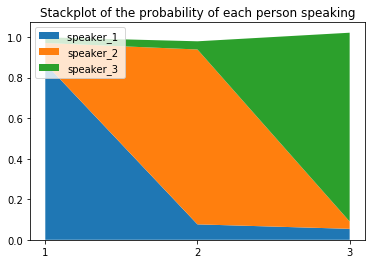

In [33]:
x = [1, 2, 3]
speaker_1, speaker_2, speaker_3 = transition

labels = ["speaker_1 ", "speaker_2", "speaker_3"]

fig, ax = plt.subplots()
ax.stackplot(x, speaker_1, speaker_2, speaker_3, labels=labels)
ax.legend(loc='upper left')
plt.xticks(x, x)
plt.title("Stackplot of the probability of each person speaking")
plt.show()


In [34]:
speaker_1

array([0.86966957, 0.07617546, 0.05415497])

In [35]:
speaker_2

array([0.10118971, 0.86271337, 0.03609692])

In [36]:
speaker_3

array([0.02813676, 0.04045454, 0.9314087 ])

## Refrences
- https://web.stanford.edu/~jurafsky/slp3/A.pdf
- http://www.adeveloperdiary.com/data-science/machine-learning/introduction-to-hidden-markov-model/